# 🧠 Support Vector Machine (SVM) - Exhaustive Master Notebook

Welcome to the **most exhaustive SVM learning notebook**!

---

- 🎯 Real World Intuition ➔
- 🧠 Why Do We Need SVM? ➔
- 🔥 Core Idea (Maximizing Margin) ➔
- 🔢 Mathematical Formulation (Optimization + Constraints) ➔
- 📈 Visualization (Margins + Support Vectors) ➔
- 🧩 Hard vs Soft Margin ➔
- ⚙️ Hyperparameters (C, Kernel, Gamma, Degree) ➔
- 🔁 Kernel Trick ➔
- 🔍 Hinge Loss ➔
- 📊 Evaluation Metrics ➔
- 🛠️ Hands-On Coding (Easy ➔ Medium ➔ Complex Datasets) ➔
- 🔎 Full Code Walkthroughs ➔
- 🎯 Hyperparameter Tuning (GridSearchCV) ➔
- 📉 Error Analysis ➔
- 🚨 Common Mistakes ➔
- 🧭 Where SVM fits in ML ➔
- ✅ Final Takeaway Checklist ➔
- 🚀 Mini Projects ➔
- ⚡ Advanced Bonus: Dual Form & SMO

# ✨ 2. Introduction to SVM

SVM stands for **Support Vector Machine**.

🎯 **Goal**: Find the best boundary (hyperplane) to separate different classes with maximum margin.

---

🌍 **Real-World Applications**:

| Application | How SVM Helps |
|:---|:---|
| ✉️ Spam Detection | Separate spam vs non-spam emails using word features. |
| 📷 Face Recognition | Distinguish face pixels from background. |
| 🔍 Handwritten OCR | Recognize digits like 2 vs 8. |
| 🧬 Bioinformatics | Classify gene sequences. |
| 🏦 Fraud Detection | Flag unusual banking transactions. |

---

🧠 **Real-World Intuition**:
> Imagine you are a border security officer 🚔 —  
> You want to build a wall that safely separates two countries, **leaving as much space** as possible on both sides.

✅ Wider margin ➔ safer, better separation!

# 🧠 3. Why Do We Need SVM?

Traditional models struggle in complex real-world data:

| Problem with Simple Models | How SVM Helps |
|:---|:---|
| Logistic Regression needs linear boundaries | SVM handles non-linear using kernels |
| KNN sensitive to noise and scaling | SVM focuses only on support vectors |
| Perceptron needs perfect separability | SVM allows soft margin violations |
| Deep Learning requires huge data | SVM performs well on small/medium datasets |

---

✅ **When to prefer SVM?**
- Limited data.
- Need high generalization.
- High-dimensional features (e.g., text, genes).

# 🔥 4. Core Idea Behind SVM

🎯 **Goal**: Maximize the margin between different classes.

---

🌟 **Visual Intuition**:
- Many hyperplanes may separate two classes.
- **SVM chooses the one that leaves the widest breathing room** ➔ Best generalization!

✅ Wider Margin = Safer Predictions on New Data

---

📚 **Important Terms**:

| Term | Meaning |
|:---|:---|
| Hyperplane | Decision boundary between classes |
| Margin | Distance between nearest points and hyperplane |
| Support Vectors | Points that touch margin boundaries |
| Slack Variables | Allow some mistakes (soft margin SVM) |

# 🔢 5. Mathematical Formulation of SVM

---

## 🎯 Objective:

We want to **maximize the margin** ➔ equivalent to **minimizing \( \|w\|^2 \)**.

Optimization Problem:

$$
\\min_{w,b} \\quad \\frac{1}{2} \\|w\\|^2
$$

---

## 📚 Subject to Constraint:

$$
y_i (w \\cdot x_i + b) \\geq 1
$$

✅ Ensures each data point lies **on correct side** of the margin.

---

## 🔗 Soft Margin (for Real-World Noisy Data):

Allow slack variables \\( \\xi_i \\geq 0 \\):

$$
\\min_{w,b,\\xi} \\quad \\frac{1}{2} \\|w\\|^2 + C \\sum \\xi_i
$$

where:
- \( C \) = Regularization Parameter (controls penalty for errors)

---

## ✍️ Dual Formulation (Hint):

Instead of solving primal, solve dual optimization:

Maximize:

$$
\\sum \\alpha_i - \\frac{1}{2} \\sum \\sum \\alpha_i \\alpha_j y_i y_j (x_i \\cdot x_j)
$$

Subject to:

$$
0 \\leq \\alpha_i \\leq C, \\quad \\sum \\alpha_i y_i = 0
$$

✅ Only support vectors have non-zero \( \\alpha \)!

---

✅ **Summary:**
- Minimize weight norm ➔ maximize margin.
- Allow slack (if needed).
- Solve via primal or dual optimization.

# 🧠 Topic 6: Visualizing Hyperplanes & Margins (ASCII + Graphs)

✅ The hyperplane **perfectly bisects** the margin.
✅ **Support Vectors** are points **closest** to the margin boundary.

---

## 🎯 What the Diagram Shows:

| Element | Meaning |
|:---|:---|
| Hyperplane | Line that separates classes |
| Margin | Width between classes |
| Support Vectors | Points touching the margins |

---

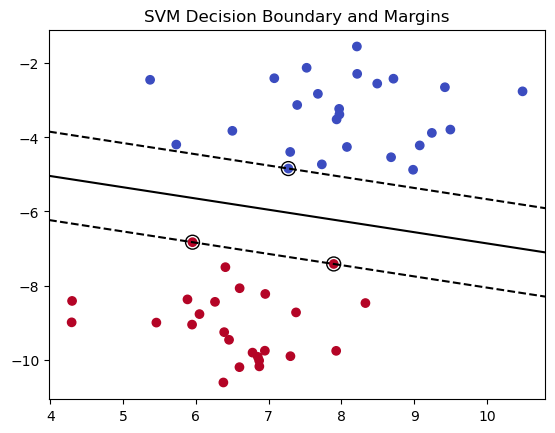

In [2]:
## 📊 Code to Visualize Margins (Matplotlib)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create simple 2D blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=6)
y = np.where(y == 0, -1, 1)  # SVM expects labels -1 and 1

# Train SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Highlight Support Vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
           s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVM Decision Boundary and Margins')
plt.show()

---

# 🧠 **Topic 7: Support Vectors Intuition**

```markdown
# 🧩 7. Support Vectors Intuition

---

## 🌟 Who are Support Vectors?

- Support Vectors = Data points that **lie closest** to the decision boundary.
- They **define** the hyperplane.
- Without them, the boundary **would change**!

---

## 🧠 Why Are Support Vectors Important?

| Concept | Meaning |
|:---|:---|
| Influence | Only support vectors matter — not all points! |
| Robustness | Moving a non-support vector doesn't change the hyperplane. |
| Efficiency | SVM can focus only on support vectors, making it computationally efficient. |

---

✅ **Support Vectors are like the pillars** of the SVM boundary —  
Move them ➔ the entire wall (hyperplane) shifts!

---

## 🎯 Fun Fact:

- In SVM dual form, **only support vectors have nonzero α**.
- All other points have **α = 0** and are ignored!

# 🧩 8. Hard Margin vs Soft Margin SVM

---

## 🛡️ Hard Margin SVM

- Assumes **perfect separability**.
- No misclassifications allowed.
- **Constraint:**
  $$
  y_i (w \\cdot x_i + b) \\geq 1
  $$

✅ Best suited for clean, noise-free datasets.

---

## 🌪️ Soft Margin SVM

- Allows **some misclassifications**.
- Introduces **slack variables** \\( \\xi_i \\geq 0 \\) to soften the boundary.
- **Modified Constraint:**
  $$
  y_i (w \\cdot x_i + b) \\geq 1 - \\xi_i
  $$
- **Modified Objective:**
  $$
  \\min \\frac{1}{2} \\|w\\|^2 + C \\sum_{i} \\xi_i
  $$

✅ Best for noisy real-world datasets.

---

## 📚 Summary Table

| Aspect | Hard Margin | Soft Margin |
|:---|:---|:---|
| Misclassifications | Not allowed | Allowed |
| C parameter | Not needed | Needed (controls penalty) |
| Use case | Clean datasets | Real-world noisy datasets |

# ⚙️ 9. Hyperparameters of SVM (Fully Exhaustive)

---

## 🔵 1. C (Regularization Parameter)

| Aspect | Details |
|:---|:---|
| 📜 Definition | Trade-off between margin width and misclassification error. |
| 🎯 Role | Low C ➔ Wider margin; High C ➔ Tighter fit. |
| 📈 Impact | High C may overfit; Low C may underfit. |
| 🔧 Tuning Tip | Try 0.01, 0.1, 1, 10, 100. |

---

## 🔵 2. Kernel

| Aspect | Details |
|:---|:---|
| 📜 Definition | Function to map data into higher-dimensional space. |
| 🎯 Role | Helps in non-linear separations. |
| 📈 Impact | Wrong kernel ➔ poor boundary. |
| 🔧 Tuning Tip | Start with 'rbf', also try 'linear'. |

---

## 🔵 3. Gamma (only for 'rbf', 'poly', 'sigmoid')

| Aspect | Details |
|:---|:---|
| 📜 Definition | Controls how far influence of a training example reaches. |
| 🎯 Role | Low gamma ➔ broader influence; High gamma ➔ localized. |
| 📈 Impact | High gamma ➔ overfitting risk. |
| 🔧 Tuning Tip | Try 0.001, 0.01, 0.1, 1, 10. |

---

## 🔵 4. Degree (for Polynomial Kernel)

| Aspect | Details |
|:---|:---|
| 📜 Definition | Degree of the polynomial kernel. |
| 🎯 Role | Higher degrees fit more complex patterns. |
| 📈 Impact | Very high degree ➔ overfitting risk. |
| 🔧 Tuning Tip | Start with degree=3, usually don't go beyond 5. |

---

✅ Always tune **C**, **Gamma**, and **Kernel** together using GridSearchCV!

# 🔁 10. Kernel Trick

---

## ✍️ Why Kernel Trick?

- Some data cannot be separated by a straight line (non-linear boundary).
- Instead of manually mapping data to higher dimensions ➔ **use a kernel function**.

✅ Kernels compute **dot products** in higher-dimensional space **without explicitly transforming data**.

---

## 📚 Common Kernels:

| Kernel | Intuition |
|:---|:---|
| Linear | Straight line/hyperplane separation. |
| Polynomial | Curved boundaries, degree controlled. |
| RBF (Radial Basis Function) | Localized circular decision boundaries. |
| Sigmoid | Similar to neural network activation functions. |

---

## 🎨 Visual Example: RBF Kernel

Imagine points in a circle:
- Impossible to separate by a straight line.
- **RBF Kernel maps them** to a space where a straight line easily separates them!

✅ RBF Kernel = Most commonly used in practice.

---

## ✍️ Mathematical View:

RBF Kernel:

$$
K(x_i, x_j) = \\exp\\left(-\\gamma \\|x_i - x_j\\|^2\\right)
$$

where:
- \\( \\gamma \\) controls spread.

✅ **Higher gamma** ➔ tighter influence.

✅ **Lower gamma** ➔ wider influence.

---

# 🔍 11. Hinge Loss Function

---

## ✨ What is Hinge Loss?

- **Hinge Loss** measures how wrong a prediction is, **specifically designed for SVM**.
- Encourages **confident and correct classifications**.

---

## 🎯 Formula:

For a data point \\( (x_i, y_i) \\):

$$
L = \\max(0, 1 - y_i (w \\cdot x_i + b))
$$

✅ If a point is classified correctly **and far outside margin** ➔ Loss = 0.  
✅ If inside margin or wrong side ➔ Loss increases **linearly**.

---

## 📊 Comparison: Hinge Loss vs Logistic Loss

| Aspect | Hinge Loss (SVM) | Logistic Loss (Logistic Regression) |
|:---|:---|:---|
| Shape | Linear | Smooth (logarithmic) |
| Focus | Margin violations | Probabilities |
| Best suited for | Hard classification | Probability estimation |

---



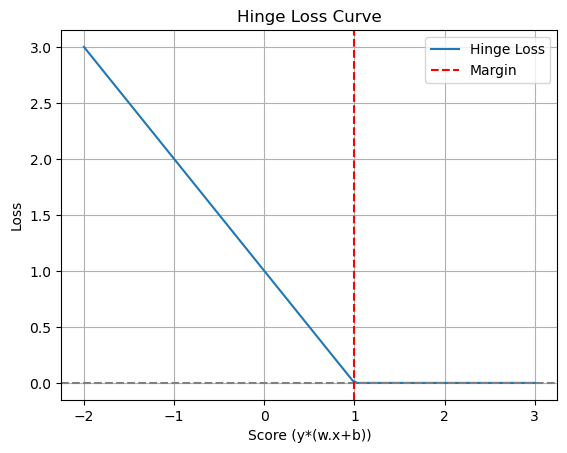

In [3]:
## 🎨 Hinge Loss Plot:

import numpy as np
import matplotlib.pyplot as plt

scores = np.linspace(-2, 3, 100)
hinge = np.maximum(0, 1 - scores)

plt.plot(scores, hinge, label='Hinge Loss')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(1, color='red', linestyle='--', label='Margin')
plt.xlabel('Score (y*(w.x+b))')
plt.ylabel('Loss')
plt.title('Hinge Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

---

# 🧠 **Topic 12: Evaluation Metrics**

```markdown
# 📊 12. Evaluation Metrics for SVM

---

After building an SVM model, we must **evaluate** it quantitatively.

---

## 📈 Common Metrics:

| Metric | Formula | Best When |
|:---|:---|:---|
| Accuracy | (TP + TN) / (Total) | Balanced classes |
| Precision | TP / (TP + FP) | False positives are costly (e.g., spam detection) |
| Recall | TP / (TP + FN) | False negatives are costly (e.g., disease detection) |
| F1-Score | 2 × (Precision × Recall) / (Precision + Recall) | Imbalanced data |
| ROC-AUC | Area under ROC Curve | Ranking probabilities for binary classification |

---

## ✍️ Key Situations:

- **Accuracy** ➔ Good if balanced dataset.
- **Precision** ➔ Important when false positives are dangerous.
- **Recall** ➔ Important when missing positives is costly.
- **F1-Score** ➔ Best when you need a balance.
- **ROC-AUC** ➔ Important for ranking problems (probabilities).

---

✅ Always report **Precision, Recall, F1-Score**, not just Accuracy, especially in imbalanced data.

# 🛠️ 13. Hands-On Code (Easy ➔ Medium ➔ Complex)


## 🌟 Easy Dataset: Iris

In [8]:


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 🌟 Medium Dataset: Wine Dataset

In [10]:
# Load dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 🧰 Code for Fashion MNIST Dataset

In [11]:
from sklearn.datasets import fetch_openml

# Load Fashion MNIST
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)

# Reduce size
X = X[:5000]
y = y[:5000].astype(int)

# Normalize pixel values
X = X / 255.0

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)  # Slightly tuned parameters
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        81
           1       0.97      0.98      0.97        95
           2       0.71      0.76      0.73       103
           3       0.92      0.88      0.90        93
           4       0.86      0.81      0.83       117
           5       0.96      0.96      0.96        99
           6       0.61      0.56      0.58        88
           7       0.93      0.92      0.93       106
           8       0.93      0.96      0.95       103
           9       0.95      0.96      0.95       115

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



---

# 🧠 **Topic 14: Code Walkthrough**

```markdown
# 🔎 14. Code Walkthrough (Line-by-Line)

---

## 🛠️ Code: Iris Dataset (Walkthrough)

1. `datasets.load_iris()`: Load flower dataset.
2. `train_test_split()`: Split into 80% training, 20% testing.
3. `StandardScaler()`: Standardize feature scale (mean=0, std=1).
4. `SVC(kernel='rbf', C=1)`: Create Support Vector Classifier with RBF kernel.
5. `fit(X_train, y_train)`: Train the model.
6. `predict(X_test)`: Make predictions on test data.
7. `classification_report()`: Evaluate precision, recall, F1-Score.

---

✅ **Every block has a purpose**:
- Scaling is mandatory.
- Proper split ensures unbiased evaluation.
- Classification report ensures we measure multiple metrics, not just accuracy.

# 🎯 15. Hyperparameter Tuning via GridSearchCV

---

## ✨ Why Tune?

- The right combination of C, Kernel, and Gamma **significantly affects** model performance.
- Manual tuning is inefficient.
- Use **GridSearchCV** to automatically find the best combination!

---

In [9]:
## 📈 Example Code:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Setup GridSearchCV
grid = GridSearchCV(SVC(), param_grid, verbose=2, cv=3)

# Fit to training data
grid.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid.best_params_)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1

# 📉 16. Error Analysis in SVM

---

## ✨ Why Error Analysis?

Building a model is just the start ➔  
**Analyzing where it fails** helps you:

- Understand **boundary weaknesses**.
- Identify **outliers**.
- Improve **future model tuning**.

---

## 🧪 Types of Errors in SVM:

| Type | Meaning | Visual Impact |
|:---|:---|:---|
| Misclassified Points | Points on wrong side of hyperplane | Appear on wrong color region |
| Margin Violators | Points within the margin boundaries | Margin errors, slight misclassification |
| Outliers | Far away points wrongly classified | Pull hyperplane awkwardly |

---



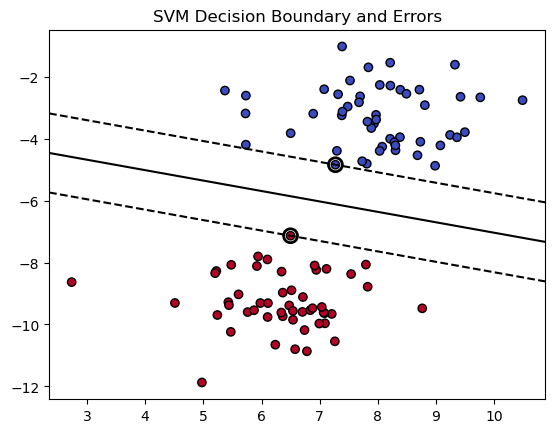

In [12]:
## 📊 Code: Visualizing Decision Boundaries and Errors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Create Data
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
y = np.where(y==0, -1, 1)

# Train
model = SVC(kernel='linear', C=1)
model.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=2, facecolors='none', edgecolors='k')
plt.title('SVM Decision Boundary and Errors')
plt.show()

---

# 🧠 **Topic 17: Common Mistakes**

```markdown
# 🚨 17. Common Mistakes in SVM Modeling

---

## ⚡ Common Pitfalls and How to Fix Them

| Mistake | Effect | Solution |
|:---|:---|:---|
| Not scaling data | Poor hyperplane calculation | Always standardize (mean=0, std=1) before SVM |
| Choosing wrong kernel | Poor decision boundary | Start with 'rbf', experiment with 'linear', 'poly' |
| Very high C value | Overfitting to training data | Try lower C, tune with cross-validation |
| Very high gamma (for RBF) | Overfitting, weird boundaries | Tune gamma using GridSearchCV |
| Training on huge datasets with SVC | Extremely slow training | Subsample dataset or use LinearSVC (approximate faster version) |

---

✅ **Best Practice**:
- Always scale ➔ tune ➔ validate with metrics ➔ visualize errors!

# 🧭 18. Where Does SVM Fit in Machine Learning?

---

## 📚 When to Prefer SVM:

| Situation | Should You Use SVM? |
|:---|:---|
| Small to medium datasets | ✅ Yes |
| High-dimensional feature space (e.g., text, genes) | ✅ Yes |
| Clear margin of separation between classes | ✅ Yes |
| Millions of samples | ❌ No — Use linear models or neural nets |
| Need Probabilities | ❌ No — Logistic regression better |

---

✅ SVM is the **best balance** between **simplicity, power, and interpretability** when:

- **Data volume** is manageable.
- **Feature count** is moderate to high.
- **Decision boundaries** are relatively clear.

---

## ⚡ SVM vs Other Models Quick Table:

| Model | SVM Strength Over It |
|:---|:---|
| KNN | SVM less sensitive to noise |
| Logistic Regression | SVM handles non-linearities via kernels |
| Random Forest | SVM better for small clean datasets |
| Neural Networks | SVM simpler, needs less data |

---

# 🎯 19. Final Takeaway Checklist (SVM)

---

✅ Key Points to Remember:

- Always **scale** features.
- Default Kernel = **RBF** (non-linear problems).
- Start with **C=1** and **gamma='scale'**.
- **Use GridSearchCV** to tune C, gamma, and kernel.
- **Support Vectors** are the key players — not all points matter.
- **Margin maximization** = core idea.
- Allow **soft margins** for real-world noisy data.
- **Error analysis** via plots is critical.
- SVM is **powerful for small to medium size datasets**.

---

✅ **Mental Model:**
- Think like a border security architect 🧱 —  
  Build the **safest**, **widest**, **most robust** wall between the two classes!

# 🚀 20. Mini Projects and Practice Exercises for SVM

---

## 🎯 Mini Project Ideas:

| Project | Dataset | Focus Area |
|:---|:---|:---|
| Handwritten Digit Classification | MNIST | Non-linear separation, large feature space |
| Spam Mail Detection | Email Text Dataset | High-dimensional sparse data (text) |
| Plant Disease Classification | PlantVillage Dataset | Image classification, noisy features |
| Credit Card Fraud Detection | Kaggle Credit Card Dataset | Imbalanced data ➔ tune C, gamma |
| Customer Churn Prediction | Telco Churn Dataset | Classification with soft margins |

---

## 🎯 Practice Exercises:

1. Tune an SVM on Iris Dataset to >98% accuracy.
2. Apply SVM on Wine Dataset and compare 'linear' vs 'rbf' kernels.
3. Create a small subset of Fashion-MNIST (1000 samples) ➔ tune C and gamma for best performance.
4. Visualize decision boundary on synthetic datasets (use `make_blobs`, `make_circles`).
5. Compare SVM vs Logistic Regression on binary classification datasets.

---

✅ Practice = **Convert knowledge ➔ Skill.**